## <center> Natual Language Processing:
# <center> 🛍️ Bag of words + 📏 Logistic regression

En general cualquier modelo puede adaptarse a cualquier tipo de datos de entrada si somos capaces de codificalos adecuadamente. En este ejemplo usaremos la regresión logística para un problema de NLP. Construiremos un clasificador que sea capaz de determinar si una crítica de una película en IMDB (https://www.imdb.com/) es positiva o negativa.

Tenemos un dataset de entrenamiento con 25000 críticas positivas y 25000 negativas en inglés, y tenemos que convertirlas en una colección de números con la que podamos alimentar al modelo de regresión logística. Para ello usaremos una tećnica muy sencilla: la bolsa de palabras (*bag of words*), que consiste en crear una colección de todas las palabras que aparecen en todas las críticas y una serie de indicadores de la presencia o ausencia de cada palabra en el texto:

<img src="../img/RegLogNLP.png" width=80% />

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

import pandas as pd

Tenemos el dataset comprimido en el repositorio del curso y desde aquí lo cargaremos, aunque originariamente se publicó [aquí](http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz) y para ver una breve descripción puede consultarse [aquí](http://ai.stanford.edu/~amaas/data/sentiment/). Contiene 25000 críticas para entrenamiento (12500 positivas y 12500 negativas) y otras 25000 para test (igualmente 12500 positivas y 12500 negativas). Hemos creado una función que carga los datos automáticamente y los descomprime en nuestro entorno de trabajo:

In [2]:
!ls ../data/movie-reviews

'IMDB Dataset.csv.zip'	 test.tsv   trainLabel.tsv   trainUnlabel.tsv


In [3]:
#!wget -P ./../data/ https://raw.githubusercontent.com/CenticMurcia/curso-ciencia-datos/master/data/movie-reviews/IMDB Dataset.csv.zip

In [4]:
df = pd.read_csv("../data/movie-reviews/IMDB Dataset.csv.zip")
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [5]:
df_train = df[:25000]
df_valid = df[25000:]

print("Number of documents in training data: %d" % len(df_train))
print("Number of documents in validation data: %d" % len(df_valid))

Number of documents in training data: 25000
Number of documents in validation data: 25000


In [6]:
df_train

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
24995,This movie was a real torture fest to sit thro...,negative
24996,John Wayne & Albert Dekker compete for oil rig...,negative
24997,Tarantino once remarked on a melodrama from th...,positive
24998,Aah yes the workout show was a great. Not only...,positive


Vemos un par de ejemplos de críticas, una positiva y una negativa:

In [7]:
df.review[0] # Positiva

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [8]:
df.review[3] # Negativa

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

# BoW o CountVectorizer
### Podemos hacer ya un recuento de las palabras que contienen las críticas:

In [9]:
cv = CountVectorizer()
cv.fit(df_train.review)

len(cv.vocabulary_)

76496

El objeto cv contiene el listado de todas las palabras de las críticas ordenadas alfabéticamente. podemos echar un vistazo a algunas de ellas: las primeras 50 y las que se encuentra en la posición entre 50000 y 50050. Vemos que las primeras son números sin sentido, y entre las restantes hay algunas que pueden tener significado o no.

In [10]:
print(cv.get_feature_names()[:50])
print(cv.get_feature_names()[50000:50050])

['00', '000', '00000001', '00001', '001', '003830', '0069', '007', '009', '00am', '00o', '00pm', '00s', '01', '0126', '01pm', '02', '029', '03', '04', '041', '05', '050', '06', '06th', '07', '08', '087', '089', '08th', '09', '0tt', '10', '100', '1000', '10000', '10000000000', '10000000000000', '1000lb', '1000s', '1001', '1004', '100b', '100bt', '100ibs', '100k', '100m', '100miles', '100min', '100mph']
['pedantry', 'peddle', 'peddled', 'peddler', 'peddlers', 'peddles', 'peddling', 'pedecaris', 'pedecarises', 'pederast', 'pederson', 'pedestal', 'pedestrian', 'pedestrians', 'pediatrician', 'pedicab', 'pedicure', 'pedigree', 'pedigreed', 'pedometers', 'pedophile', 'pedophiles', 'pedophilia', 'pedophiliac', 'pedophilic', 'pedro', 'pee', 'peeble', 'peebles', 'peed', 'peeing', 'peek', 'peekaboo', 'peeked', 'peeking', 'peeks', 'peel', 'peeled', 'peeling', 'peels', 'peen', 'peens', 'peep', 'peeped', 'peepers', 'peephole', 'peeping', 'peeples', 'peer', 'peerage']


Ahora vamos a transformar las críticas en secuencias de índices que hacen referencia a las palabras de nuestro listado:

In [11]:
x_train = cv.transform(df_train.review)
y_train = df_train.sentiment
x_train.shape

(25000, 76496)

In [12]:
y_train.value_counts()

negative    12526
positive    12474
Name: sentiment, dtype: int64

In [13]:
df.review[5]

'Probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a noble cause, but it\'s not preachy or boring. It just never gets old, despite my having seen it some 15 or more times in the last 25 years. Paul Lukas\' performance brings tears to my eyes, and Bette Davis, in one of her very few truly sympathetic roles, is a delight. The kids are, as grandma says, more like "dressed-up midgets" than children, but that only makes them more fun to watch. And the mother\'s slow awakening to what\'s happening in the world and under her own roof is believable and startling. If I had a dozen thumbs, they\'d all be "up" for this movie.'

In [14]:
row = pd.DataFrame(data=x_train[5].todense(), columns=cv.get_feature_names())
row

,00,000,00000001,00001,001,003830,0069,007,009,00am,...,ïn,óli,önsjön,über,übermenschlich,überwoman,ünfaithful,üvegtigris,üzümcü,żmijewski
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
row.T[(row.T[0] != 0)].T

,15,25,all,and,are,as,awakening,be,believable,bette,...,times,to,truly,under,up,very,watch,what,world,years
0,1,1,2,5,1,1,1,1,1,1,...,1,4,1,1,2,1,1,1,1,1


### Y hacemos la misma transformación para el conjunto de test:

In [16]:
%%time
x_valid = cv.transform(df_valid.review)
y_valid = df_valid.sentiment

CPU times: user 2.58 s, sys: 23.4 ms, total: 2.6 s
Wall time: 2.6 s


In [17]:
y_valid.value_counts()

positive    12526
negative    12474
Name: sentiment, dtype: int64

### Entrenar el modelo de regresión logística:

In [18]:
%%time
logit = LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=7)
logit.fit(x_train, y_train)

CPU times: user 41.3 ms, sys: 39.7 ms, total: 81 ms
Wall time: 2.3 s


LogisticRegression(n_jobs=-1, random_state=7)

Vamos a ver el accuracy de los conjuntos de entrenamiento y test. Vemos que los resultados son bastante buenos:

In [19]:
print("TRAINING ACCURACY:", round(logit.score(x_train, y_train), 3))
print("VALDATION ACCURACY:", round(logit.score(x_valid, y_valid), 3))

TRAINING ACCURACY: 0.981
VALDATION ACCURACY: 0.886


Podemos ahora ver los coeficientes de las palabras, para ver cuáles contribuyen más a que la crítica se considere como positiva o negativa:

In [20]:
def visualize_coefficients(classifier, feature_names, n_top_features=25):
    # get coefficients with large absolute values 
    coef = classifier.coef_.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])
    # plot them
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * n_top_features), feature_names[interesting_coefficients], rotation=60, ha="right");


In [21]:
def plot_grid_scores(grid, param_name):
    plt.plot(grid.param_grid[param_name], grid.cv_results_['mean_train_score'],
        color='green', label='train')
    plt.plot(grid.param_grid[param_name], grid.cv_results_['mean_test_score'],
        color='red', label='test')
    plt.legend();
    

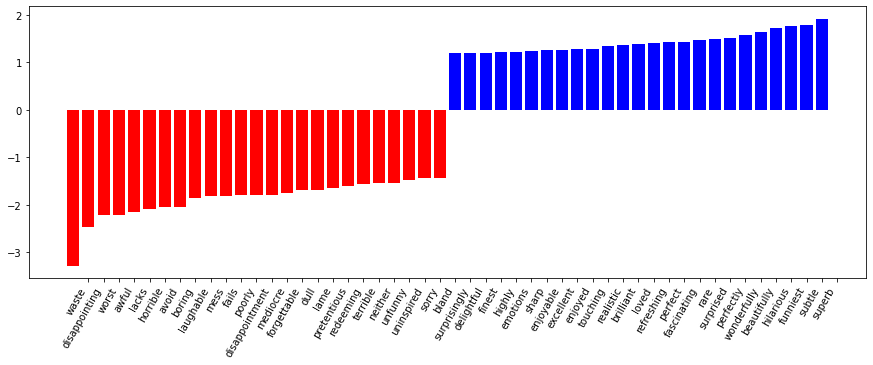

In [22]:
visualize_coefficients(logit, cv.get_feature_names())

In [26]:
puntuaciones = logit.predict_proba(x_valid)[:,1]

In [34]:
textos = pd.DataFrame({
    'puntuacion': puntuaciones,
    'puntBuenas': puntuaciones > 0.95,
    'puntNormal': ((puntuaciones < 0.55) & (puntuaciones > 0.45)),
    'puntMalas' : puntuaciones < 0.05,
    'texto'     : df_valid.review.values
})
textos

,puntuacion,puntBuenas,puntNormal,puntMalas,texto
0,0.000034,False,False,True,This movie was bad from the start. The only pu...
1,0.000028,False,False,True,"God, I never felt so insulted in my whole life..."
2,0.999936,True,False,False,Not being a fan of the Coen Brothers or George...
3,1.000000,True,False,False,The movie Andaz Apna Apna in my books is the t...
4,0.101773,False,False,False,I have to say I was really looking forward on ...
...,...,...,...,...,...
24995,0.999926,True,False,False,I thought this movie did a down right good job...
24996,0.000563,False,False,True,"Bad plot, bad dialogue, bad acting, idiotic di..."
24997,0.462865,False,True,False,I am a Catholic taught in parochial elementary...
24998,0.171648,False,False,False,I'm going to have to disagree with the previou...


In [35]:
textos[textos.puntBuenas == True].head(5)

,puntuacion,puntBuenas,puntNormal,puntMalas,texto
2,0.999936,True,False,False,Not being a fan of the Coen Brothers or George...
3,1.000000,True,False,False,The movie Andaz Apna Apna in my books is the t...
5,0.996042,True,False,False,This film powerfully demonstrates the struggle...
10,1.000000,True,False,False,"Election is a Chinese mob movie, or triads in ..."
11,0.999998,True,False,False,Utterly brilliant. Powerful and evocative. The...


In [36]:
textos.texto[2]

'Not being a fan of the Coen Brothers or George Clooney, anyone can see the skepticism I took into the theater. Once again, someone in Hollywood dares to create something different. This time it was those zanie (for a temporary lack of a better word) Coens doing "their thing" to one of the great works in literary history. Who would\'ve ever thought Homer had this in mind? I don\'t know where this film is going to fit in the history books of Hollywood, but it will be in both mine and many others DVD or VHS library. It is one of those films that you can watch over and over. The story is brilliantly written. Clean and entertaining, with a couple of Gumpesque brushes with fame, great performances by Clooney, Turturro, Nelson, and a brief but hilarious Holly Hunter. Being born in Mississippi and raised in other parts of the south, I wish more people would poke a little fun at us like this. They even invoke a soundtrack fitting for the rural south. You are NOT doing anything better this week

In [37]:
textos[textos.puntNormal == True].head(5)

,puntuacion,puntBuenas,puntNormal,puntMalas,texto
99,0.546200,False,True,False,So keira knightly is in it...So automatically ...
224,0.453640,False,True,False,"""For a Squadron Leader - normally the only guy..."
324,0.453975,False,True,False,If you're amused by straight-faced goings-on t...
351,0.515039,False,True,False,If you like bad movies (and you must to watch ...
366,0.453437,False,True,False,When I first started watching this movie I was...


In [38]:
textos.texto[99]

"So keira knightly is in it...So automatically we compare this film to attonement. Aside rom the fact that this film is also wartime and her appearance is uncanning, these films are totally different.<br /><br />The Actors work well, i think one good thing is there is no memorable person, they are a team.<br /><br />If you want a film where things happen, then id advise another as the story of this film is about human interaction and their physche's damaged by their experiences and how their lives are intertwined.<br /><br />This film have genuine interaction, perfect pause moments that make you hold your breath. No its not exciting, but it is gripping if you can empathise with these characters. At moments i wondered if this film may have been better as a theatrical play rather than a movie. We expect a lot from movies as everything is possible, and yet with theatre we allow for interaction and rely on belief.<br /><br />There are things wrong with it if your looking for a blockbuster,

In [39]:
textos[textos.puntMalas == True].head(5)

,puntuacion,puntBuenas,puntNormal,puntMalas,texto
0,3.373430e-05,False,False,True,This movie was bad from the start. The only pu...
1,2.757309e-05,False,False,True,"God, I never felt so insulted in my whole life..."
7,1.918794e-02,False,False,True,Susie Q is an original and isn't like those ot...
9,8.673275e-08,False,False,True,STUDIO 666 (aka THE POSSESSED in the UK) is an...
18,1.526692e-04,False,False,True,I really don't understand who this movie is ai...


In [40]:
textos.texto[18]

"I really don't understand who this movie is aimed at. From just the absurdity of it, not to mention the ridiculously bad acting, cheesy dialogue, and the fact that the villain is a child, I'd assume this was meant to be a children's movie... but I think there may be more swear words than Pulp Fiction, not to mention constant references to drugs and general mayhem and killing-so which demographic is it trying to please? This movie is too schizophrenic, like trying to combine Country music with Heavy metal, in the end no one is going to like it because it's a bloody paradox. I would recommend this movie because it's so funny (in a bad way) except the actors are so patently unbearable that I wouldn't want to suggest otherwise.<br /><br />I'm completely serious when I say that I could not watch more than 15 minutes of this. Terrrrrrrrrrrrrrrriiiiiiiiiiiible"

Como práctica, podemos repetir el ejercicio usando Random Forest:

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
forest = RandomForestClassifier(n_estimators=200, 
                                n_jobs=-1, random_state=17)

In [43]:
%%time
forest.fit(x_train, y_train)

CPU times: user 1min 39s, sys: 355 ms, total: 1min 40s
Wall time: 26.8 s


RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=17)

In [44]:
print("TRAINING ACCURACY:", round(forest.score(x_train, y_train), 3))
print("VALDATION ACCURACY:", round(forest.score(x_valid, y_valid), 3))

TRAINING ACCURACY: 1.0
VALDATION ACCURACY: 0.856
